In [1]:
import sys
import gpytorch
import numpy as np
import pandas as pd
import torch
from datetime import datetime
from scipy.stats import qmc
import itertools
from itertools import combinations_with_replacement, combinations, permutations

import bo_methods_lib
# from bo_methods_lib.bo_methods_lib.bo_functions_generic import gen_theta_set, clean_1D_arrays
from bo_methods_lib.bo_methods_lib.GPBO_Classes_New import * #Fix this later
from bo_methods_lib.bo_methods_lib.GPBO_Class_fxns import * #Fix this later
from bo_methods_lib.bo_methods_lib.analyze_data import * #Fix this later
from bo_methods_lib.bo_methods_lib.GPBO_Classes_plotters import * #Fix this later
import pympler
import pickle

from pympler import asizeof

from matplotlib import pyplot as plt

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Get all data from sf experiemnts
date_time_str = "2023/09/06/"
date_time_str = "No_Date/"
save_csv = False
name_cs_str = "CS1" 
meth_name_str_list = ["A1", "B1", "A2", "B2", "C2"]
# meth_name_str_list = ["C2"]
f = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
f = [0.9]
precision = 1
study_param_list = [f"{number:.{precision}f}" for number in f]
study_id = "sf"
param_name_str = None

#Get all sf_data  
df, theta_true = get_study_data_org(date_time_str, name_cs_str, meth_name_str_list, study_id, 
                                    study_param_list, save_csv = False)

file_path_list = [date_time_str + "Data_Files/" + name_cs_str + "_BO_method_" + meth + "_sep_fact_0.9.gz" for meth in meth_name_str_list ]
print(file_path_list)

['No_Date/Data_Files/CS1_BO_method_A1_sep_fact_0.9.gz', 'No_Date/Data_Files/CS1_BO_method_B1_sep_fact_0.9.gz', 'No_Date/Data_Files/CS1_BO_method_A2_sep_fact_0.9.gz', 'No_Date/Data_Files/CS1_BO_method_B2_sep_fact_0.9.gz', 'No_Date/Data_Files/CS1_BO_method_C2_sep_fact_0.9.gz']


In [3]:
#Get Best Data from ep experiment
save_csv = False
df_best = get_best_data(df, study_id, name_cs_str, theta_true, param_name_str, date_time_str, save_csv)
df_best

# #Get Mean Data from ep experiment
# df_mean = get_mean_data(df, study_id, name_cs_str, theta_true, param_name_str, date_time_str, save_csv)
# df_mean

# #Get Median Data from ep experiment
# df_median = get_median_data(df, study_id, name_cs_str, theta_true, param_name_str, date_time_str, save_csv)

# #Get Median of Best Data from ep experiment
# df_median_best = get_median_data(df_best, study_id, name_cs_str, theta_true, param_name_str, date_time_str, save_csv)
# df_median_best

,Run Number,BO Iter,Best Error,Exploration Bias,Max EI,Theta Max EI,Min Obj,Min Obj Act,Theta Min Obj,Min Obj Cum.,Theta Min Obj Cum.,Time/Iter,Sep Fact,BO Method,Max Evals,Total Run Time,L2 Norm Theta
0,0,0,9.650632,1.0,0.0,"[-0.5032137171095756, -0.02317312249415404]",-14.158229,14.475728,"[2.0, -1.362820993197013]",14.475728,"[2.0, -1.362820993197013]",0.051924,0.9,A1,1,0.051924,1.063785
1,0,0,2.267023,1.0,0.0,"[-0.5032137171095756, -0.02317312249415404]",1.70539,-1.046993,"[1.069013379517296, -1.0944587006478796]",-1.046993,"[1.069013379517296, -1.0944587006478796]",0.08119,0.9,B1,1,0.08119,0.116984
2,0,0,9.650632,1.0,48.202757,"[0.9797215660607932, -0.9899346602025708]",0.000695,0.0052,"[0.9840672196388947, -0.9911530709057801]",0.0052,"[0.9840672196388947, -0.9911530709057801]",0.501323,0.9,A2,1,0.501323,0.018224
3,0,0,2.267023,1.0,40.672805,"[0.9797049407019048, -0.9899295511703976]",-7.27226,-5.259155,"[0.9840671426203914, -0.9911530394191107]",-5.259155,"[0.9840671426203914, -0.9911530394191107]",50.20172,0.9,B2,1,50.20172,0.018224
4,0,0,9.650632,1.0,0.0,"[-0.6406910481352299, -1.25246266808837]",0.000695,0.0052,"[0.9840672196388947, -0.9911530709057801]",0.0052,"[0.9840672196388947, -0.9911530709057801]",0.341174,0.9,C2,1,0.341174,0.018224


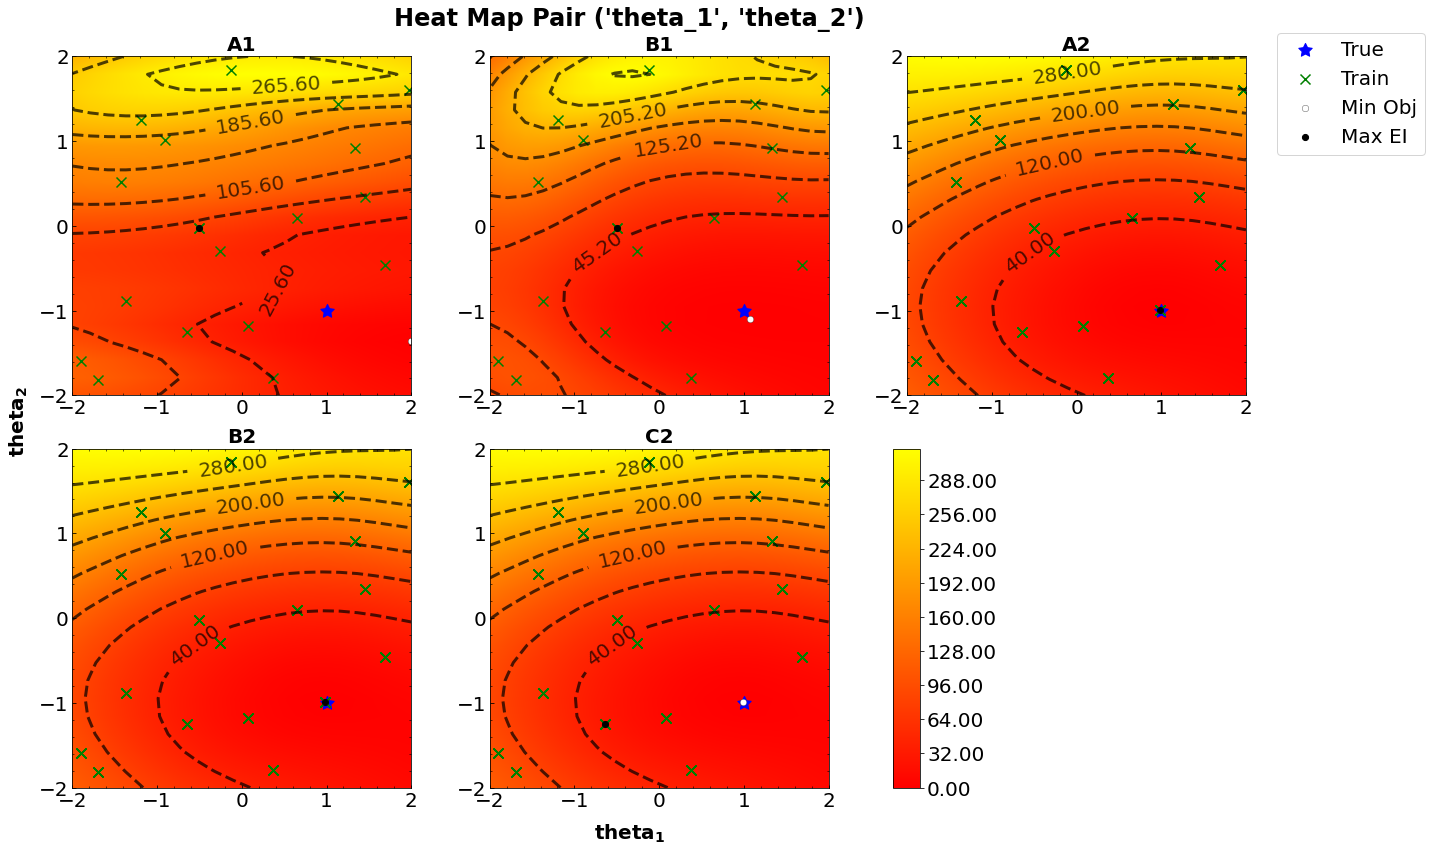

In [4]:
title_fontsize = 24
other_fontsize = 20
xbins = 4
ybins = 5
zbins = 900
save_path = None
cmap = "autumn"
pair = 0


title = "Heat Map Pair "
z_choice = "sse_mean"
levels = [100,100,100, 100, 100]
run_num_list = df_best["Run Number"].iloc[:] + 1
bo_iter_list = df_best["BO Iter"].iloc[:] + 1
meth_name_str_list = ["A1", "B1", "A2", "B2", "C2"]
pair = 0

compare_method_heat_maps(file_path_list, meth_name_str_list, run_num_list, bo_iter_list, pair, 
                         z_choice, levels, xbins, ybins, zbins, title, title_fontsize, other_fontsize, 
                         cmap, save_path)